In [1]:
import os
# Find the latest version of spark 3.0  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.3'
spark_version = 'spark-3.1.2'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.0 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ub

In [4]:
from pyspark.sql import SparkSession

In [11]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving source_mock-up.csv to source_mock-up.csv


In [13]:
import io
df = pd.read_csv(io.BytesIO(uploaded['source_mock-up.csv']))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# import libraries
import pandas as pd
import numpy as np

In [16]:
# check data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
# replace blanks with np.nan
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
# convert to float64
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [21]:
import plotly.express as px

fig = px.scatter(x=df['tenure'], y=df['TotalCharges'], 
                 color = df['Churn'], template = 'presentation', 
                 opacity = 0.5, facet_col = df['Contract'], 
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Total Charges $'})
                
fig.show()

In [23]:
# check missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Common to all modules in PyCaret, the setup is the first and the only mandatory step in any machine learning experiment performed in PyCaret. This function takes care of all the data preparation required prior to training models.

In [27]:
pip install pycaret

     |████████████████████████████████| 266 kB 5.4 MB/s 
     |████████████████████████████████| 86 kB 4.0 MB/s 
     |████████████████████████████████| 16.9 MB 43 kB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 6.8 MB 28.4 MB/s 
     |████████████████████████████████| 1.7 MB 70.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 46.0 MB/s 
     |████████████████████████████████| 1.3 MB 27.7 MB/s 
     |████████████████████████████████| 261 kB 52.7 MB/s 
     |████████████████████████████████| 113 kB 55.5 MB/s 
     |████████████████████████████████| 167 kB 59.2 MB/s 
     |████████████████████████████████| 271 kB 31.5 MB/s 
     |████████████████████████████████| 62 kB 741 kB/s 
     |████████████████████████████████| 10.1 MB 29.3 MB/s 
     |████████████████████

In [28]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [30]:
# init setup
from pycaret.classification import *
s = setup(df, target = 'Churn', ignore_features = ['customerID'])

,Description,Value
0,session_id,5626
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 21)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [31]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8087,0.8471,0.5412,0.6711,0.5984,0.4748,0.4801,0.681
ada,Ada Boost Classifier,0.8083,0.8428,0.5351,0.6714,0.5951,0.4717,0.4772,0.266
lr,Logistic Regression,0.8059,0.8418,0.5435,0.6609,0.5958,0.4698,0.4741,0.405
lightgbm,Light Gradient Boosting Machine,0.7968,0.8404,0.5289,0.6387,0.5782,0.4460,0.4497,0.158
lda,Linear Discriminant Analysis,0.7998,0.8357,0.5497,0.6406,0.5909,0.4596,0.4624,0.039
nb,Naive Bayes,0.7479,0.8276,0.7722,0.5151,0.6176,0.4407,0.4611,0.022
rf,Random Forest Classifier,0.7903,0.8221,0.4865,0.6326,0.5495,0.4160,0.4224,0.821
et,Extra Trees Classifier,0.7738,0.7937,0.4735,0.5883,0.5239,0.3781,0.3823,0.770
knn,K Neighbors Classifier,0.7631,0.7473,0.4342,0.5658,0.4907,0.3401,0.3454,0.143
dt,Decision Tree Classifier,0.7296,0.6517,0.4842,0.4869,0.4849,0.3018,0.3022,0.039


In [32]:
# print best_model parameters
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5626, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [33]:
# tune best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8215,0.8611,0.5462,0.7100,0.6174,0.5036,0.5109
1,0.7992,0.8283,0.5462,0.6396,0.5892,0.4574,0.4599
2,0.8053,0.8382,0.5154,0.6700,0.5826,0.4584,0.4651
3,0.7992,0.8360,0.5077,0.6535,0.5714,0.4430,0.4490
4,0.8316,0.8539,0.5846,0.7238,0.6468,0.5379,0.5432
5,0.7890,0.8440,0.5077,0.6226,0.5593,0.4225,0.4263
6,0.7911,0.8292,0.4923,0.6337,0.5541,0.4205,0.4262
7,0.8114,0.8518,0.5462,0.6762,0.6043,0.4823,0.4870
8,0.7992,0.8394,0.4769,0.6667,0.5561,0.4309,0.4410
9,0.8032,0.8376,0.5504,0.6455,0.5941,0.4654,0.4679


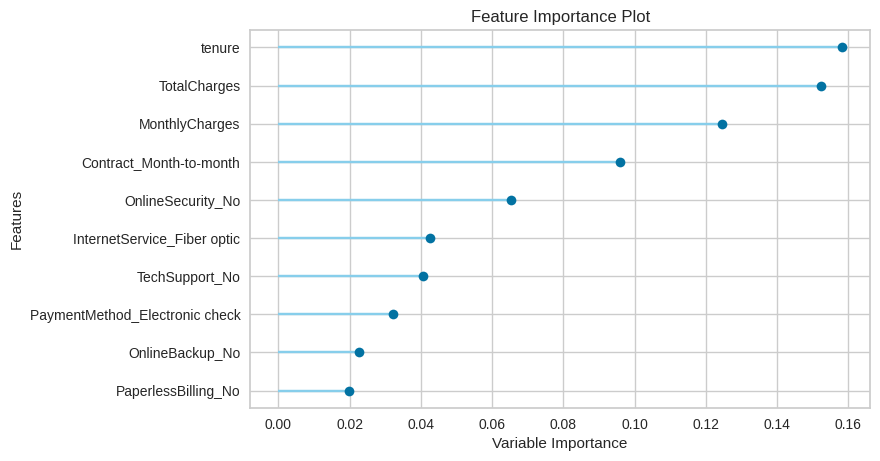

In [35]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

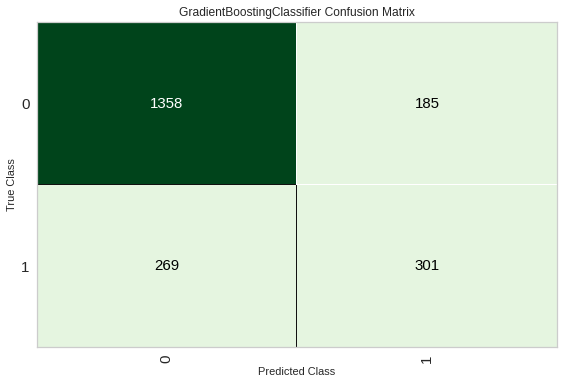

In [36]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

It’s a good model but the problem is it’s not a business-smart model. It is doing a pretty good job compared to if you have no model but how can we train and select a model that maximizes the business value. In order to achieve that we have to train, select, and optimize models using business metrics instead of any conventional metric like AUC or Accuracy.

In [40]:
# create a custom function
def calculate_profit(y, y_pred):
    true_positive = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    false_positive = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([true_positive,false_positive])
# add metric to PyCaret
add_metric('profit2', 'Profit2', calculate_profit)

Name                                                       Profit2
Display Name                                               Profit2
Score Function       <function calculate_profit at 0x7fe461e074d0>
Scorer                               make_scorer(calculate_profit)
Target                                                        pred
Args                                                            {}
Greater is Better                                             True
Multiclass                                                    True
Custom                                                        True
Name: profit2, dtype: object

We are assuming that we are offering vouchers to customers who are predicted as churning. The vouchers are worth 1000 USD. Each customer who doesn't churn will bring back 5000 USD as a lifetime value. Now these business metrics are added to the parameters.

In [41]:
# Now let’s run compare_models and see the magic.
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,Profit2,TT (Sec)
nb,Naive Bayes,0.7479,0.8276,0.7722,0.5151,0.6176,0.4407,0.4611,306500.0,306500.0,0.023
gbc,Gradient Boosting Classifier,0.8087,0.8471,0.5412,0.6711,0.5984,0.4748,0.4801,246500.0,246500.0,0.660
lr,Logistic Regression,0.8059,0.8418,0.5435,0.6609,0.5958,0.4698,0.4741,246000.0,246000.0,0.378
lda,Linear Discriminant Analysis,0.7998,0.8357,0.5497,0.6406,0.5909,0.4596,0.4624,245400.0,245400.0,0.042
ada,Ada Boost Classifier,0.8083,0.8428,0.5351,0.6714,0.5951,0.4717,0.4772,243900.0,243900.0,0.250
lightgbm,Light Gradient Boosting Machine,0.7968,0.8404,0.5289,0.6387,0.5782,0.4460,0.4497,235800.0,235800.0,0.155
ridge,Ridge Classifier,0.8028,0.0000,0.5135,0.6635,0.5781,0.4524,0.4592,232800.0,232800.0,0.022
rf,Random Forest Classifier,0.7903,0.8221,0.4865,0.6326,0.5495,0.4160,0.4224,216100.0,216100.0,0.768
et,Extra Trees Classifier,0.7738,0.7937,0.4735,0.5883,0.5239,0.3781,0.3823,202900.0,202900.0,0.731
svm,SVM - Linear Kernel,0.6757,0.0000,0.5611,0.5360,0.4683,0.2758,0.3241,188700.0,188700.0,0.062


Notice that a new column Profit is added this time and surprisingly Naive Bayes which is a pretty bad model in terms of AUC is the best model when it comes to profit. Let’s see how:

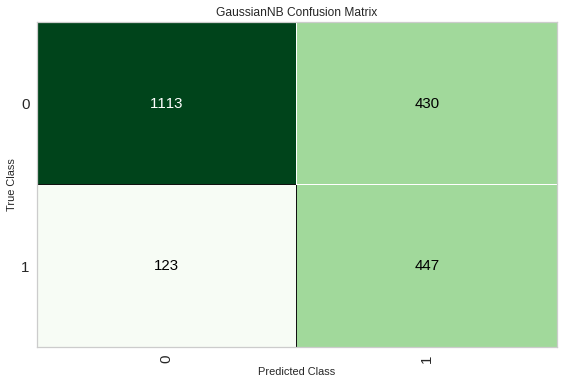

In [42]:
# confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

With GradientBoostingClassifier, 301 out of 570 churn customers were correctly predicted. Pycaret allows us to add a business metric and after doing it, the model prototyping returned Naive Bayes as the best performing model when it comes to the Profit parameter. Naive Bayes correctly preditcs 447 out of 570 churn customers. Interesting, the accuracy of the Naive Bayes model is worse than the accuracy of the GradientBoostingClassifier. When predicting churn, using the conventional ML model assessment metrics may not always be the best decision, as seen from this example. 